# SISTEMA DE APROVAÇÃO DE CRÉDITO IMOBILIÁRIO

## Definição do Problema

A utilização de **Machine Learning** na aprovação de crédito tem se mostrado cada vez mais importante para as instituições financeiras. Essa abordagem permite uma análise mais precisa e eficiente das solicitações de crédito, ajudando a automatizar o processo de decisão e a reduzir os riscos envolvidos.

Dentre algumas das principais razões pelas quais essa tecnologia é relevante para a aprovação de crédito, estão:

- Análise de dados complexos: O machine learning é capaz de lidar com grandes volumes de dados e identificar padrões ocultos que podem ser relevantes para a análise de crédito. Ele pode analisar informações provenientes de várias fontes, como histórico de pagamentos, pontuação de crédito, informações demográficas, comportamento de gastos e muito mais.

- Tomada de decisão automatizada: Ao utilizar algoritmos de machine learning, as instituições financeiras podem automatizar a tomada de decisão na aprovação de crédito. Os modelos de machine learning podem aprender com dados históricos e tomar decisões consistentes e imparciais, evitando vieses humanos.

- Melhor precisão na avaliação de riscos: Os modelos de machine learning podem analisar uma ampla variedade de variáveis e fornecer uma avaliação mais precisa do risco envolvido em uma transação de crédito. Isso pode ajudar as instituições financeiras a identificar com mais precisão os clientes com maior probabilidade de inadimplência.

No entanto, a utilização de machine learning na aprovação de crédito também apresenta alguns desafios e problemas para as instituições financeiras:

- Interpretabilidade dos modelos: Muitos algoritmos de machine learning, como redes neurais profundas, são considerados caixas-pretas, o que significa que é difícil entender como exatamente eles chegaram a uma determinada decisão. Isso pode ser um desafio para as instituições financeiras explicarem suas decisões aos clientes e órgãos reguladores.

- Coleta de dados e qualidade dos dados: Para treinar modelos de machine learning eficazes, é necessário ter acesso a dados relevantes e de qualidade. As instituições financeiras podem enfrentar desafios na coleta de informações adequadas, bem como problemas de qualidade dos dados, como informações inconsistentes ou incompletas.

- Preconceito e vieses: Os modelos de machine learning podem ser influenciados por preconceitos existentes nos dados de treinamento. Se esses dados contiverem vieses relacionados a raça, gênero ou outros fatores protegidos, os modelos podem reproduzir esses vieses e resultar em decisões injustas ou discriminatórias.

## O que será aplicado a este projeto

O objetivo desse projeto, de nível intermediário é treinar as técnicas de análise e preparação de dados, para então, construir nossas máquinas preditivas. Assim, serão aplicados:
- Normalização
- Balanceamento
- Tratamento de outliers e valores nulos
- Visualizações
- Máquinas Preditivas

### Bibliotecas

**Instalação de pacotes (caso precise instalar o Xgboost)**

In [238]:
#!pip install xgboost

In [324]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


from IPython.core.display import display, HTML
display( HTML( '<style>.container { width:100% !important; }</style>'))
pd.options.display.max_columns = 15
pd.options.display.max_rows = 50

In [240]:
import xgboost as xgb
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Importação dos dados

In [241]:
dados = pd.read_csv('imobiliario.csv')
dados

,idade,empregador,renda,education,education_num,estado_civil,ocupacao,relacionamento,race,sex,investimentos,endividamento,horas_por_semana,nacionalidade,aprovacao_credito
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,não aprovado
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,não aprovado
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,não aprovado
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,não aprovado
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,não aprovado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,não aprovado
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,APROVADO
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,não aprovado
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,não aprovado


## 01 Análise Exploratória

> PRIMEIRAS ANÁLISES
- Existem 2 colunas sobre **education**, uma textual e a outra numeral (inteiro)
- A variável **estado-civil** nós podemos transformá-la em variável numérica
- A mesma coisa pode ser feita com a variável **ocupacao**, **race**, **sex** e **aprovacao_credito**
- Faremos uma análise de cada variável separadamente

In [242]:
# Estudando os tipos das variáveis
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   idade              32561 non-null  int64 
 1   empregador         32561 non-null  object
 2   renda              32561 non-null  int64 
 3   education          32561 non-null  object
 4   education_num      32561 non-null  int64 
 5   estado_civil       32561 non-null  object
 6   ocupacao           32561 non-null  object
 7   relacionamento     32561 non-null  object
 8   race               32561 non-null  object
 9   sex                32561 non-null  object
 10  investimentos      32561 non-null  int64 
 11  endividamento      32561 non-null  int64 
 12  horas_por_semana   32561 non-null  int64 
 13  nacionalidade      32561 non-null  object
 14  aprovacao_credito  32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


> As colunas do dataset alternam idiomas deixaremos todas em um único idioma(Inglês), devido aos dados estarem nesse idioma

In [243]:
dados.columns

Index(['idade', 'empregador', 'renda', 'education', 'education_num',
       'estado_civil', 'ocupacao', 'relacionamento', 'race', 'sex',
       'investimentos', 'endividamento', 'horas_por_semana', 'nacionalidade',
       'aprovacao_credito'],
      dtype='object')

In [244]:
renomear_cols = {
    'idade': 'age',
    'empregador': 'employer',
    'renda': 'income',
    'estado_civil': 'marital',
    'ocupacao': 'occupation',
    'relacionamento': 'relationship',
    'investimento': 'investments',
    'endividamento': 'indebtedness',
    'horas_por_semana': 'hour_per_week',
    'nacionalidade': 'country',
    'aprovacao_credito': 'credit_approval'
}

In [245]:
dados = dados.rename(columns = renomear_cols)

In [246]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1   employer         32561 non-null  object
 2   income           32561 non-null  int64 
 3   education        32561 non-null  object
 4   education_num    32561 non-null  int64 
 5   marital          32561 non-null  object
 6   occupation       32561 non-null  object
 7   relationship     32561 non-null  object
 8   race             32561 non-null  object
 9   sex              32561 non-null  object
 10  investimentos    32561 non-null  int64 
 11  indebtedness     32561 non-null  int64 
 12  hour_per_week    32561 non-null  int64 
 13  country          32561 non-null  object
 14  credit_approval  32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [247]:
# Visualizando o número de linhas e colunas
dados.shape

(32561, 15)

In [248]:
# Estatísticas descritivas das variáveis numéricas
dados.describe()

,age,income,education_num,investimentos,indebtedness,hour_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


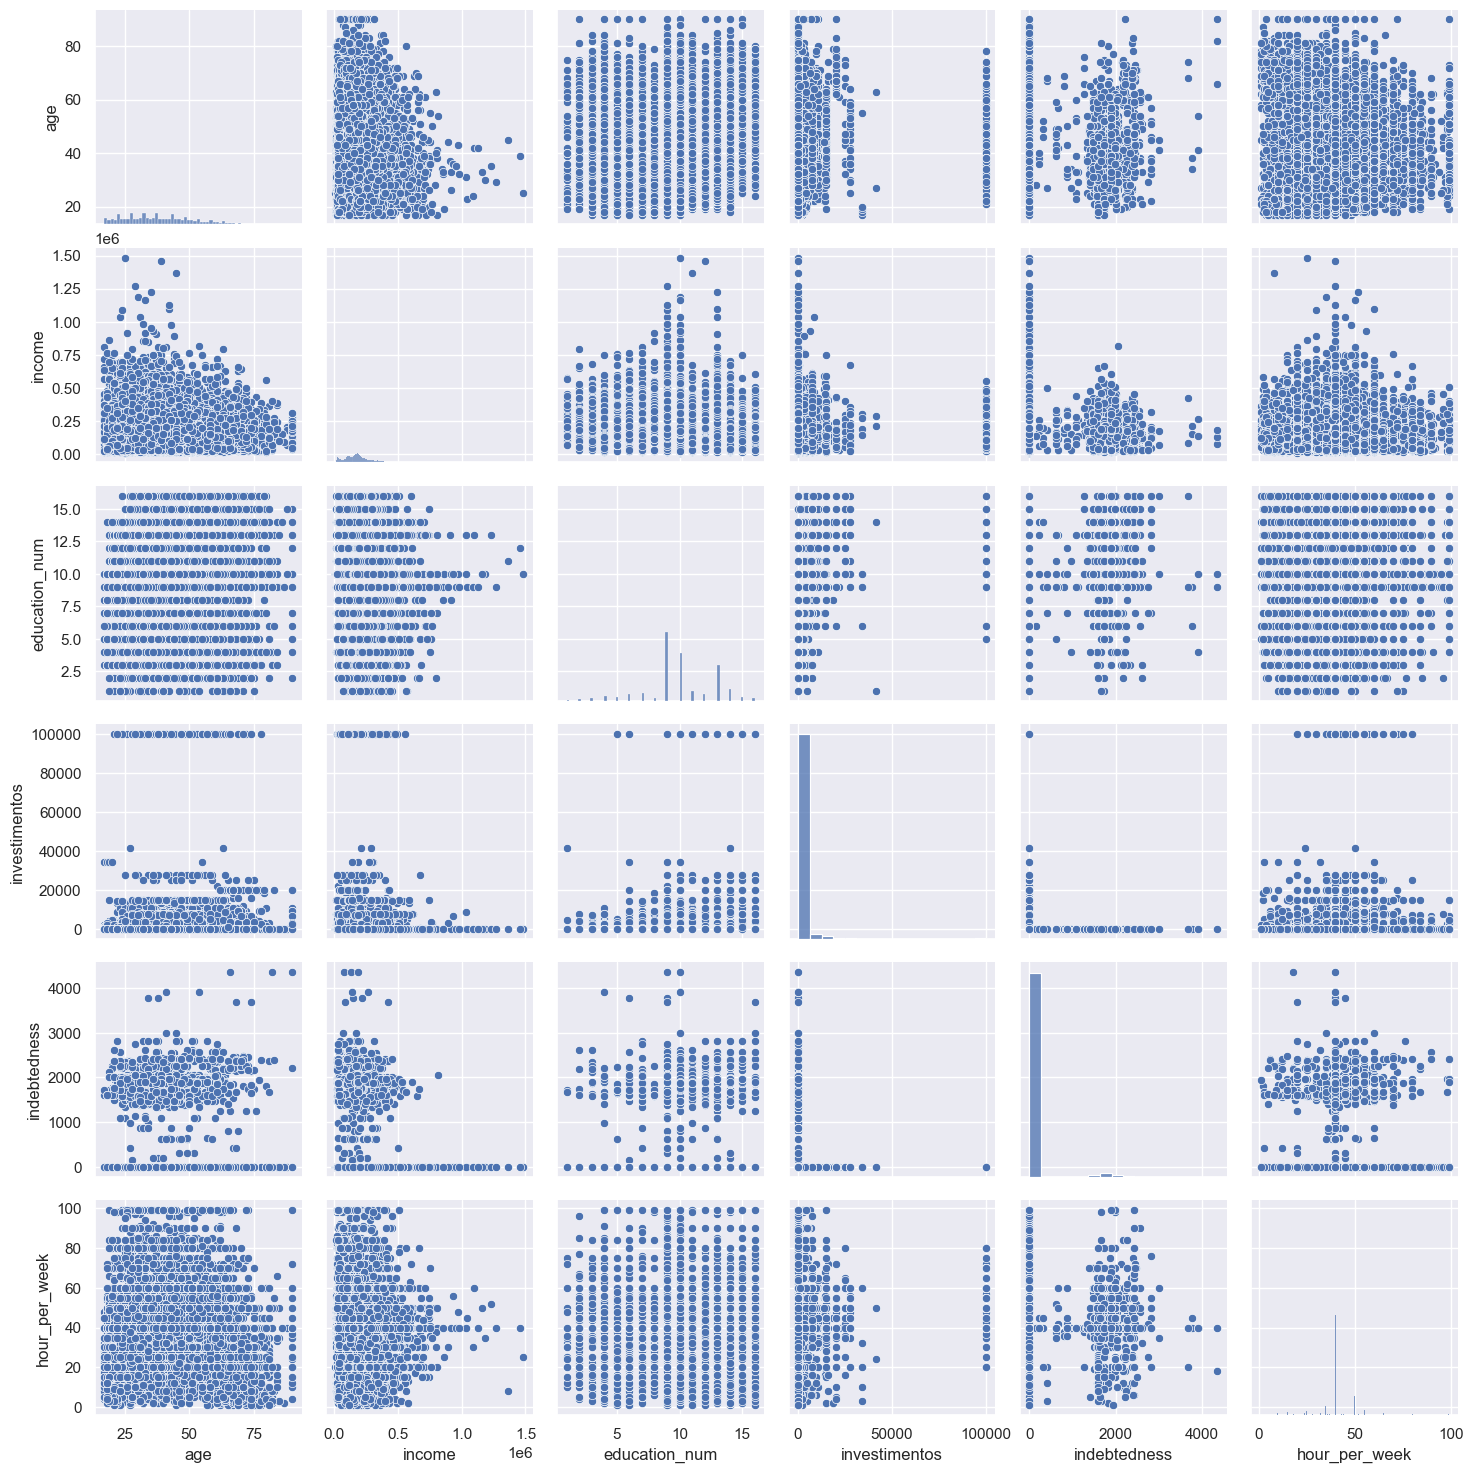

In [249]:
# Analisando a distribuição dos dadps
sns.pairplot(dados)

In [250]:
# Verificando presença de dados ausentes
dados.isnull().sum()

age                0
employer           0
income             0
education          0
education_num      0
marital            0
occupation         0
relationship       0
race               0
sex                0
investimentos      0
indebtedness       0
hour_per_week      0
country            0
credit_approval    0
dtype: int64

In [251]:
# Dados duplicados
dados.duplicated().value_counts()

False    32537
True        24
dtype: int64

In [252]:
dados.columns

Index(['age', 'employer', 'income', 'education', 'education_num', 'marital',
       'occupation', 'relationship', 'race', 'sex', 'investimentos',
       'indebtedness', 'hour_per_week', 'country', 'credit_approval'],
      dtype='object')

## 02 Pré-Processamento

> Percebemos a presença de dados duplicados, faremos uma análise sobre estes

### 2.1 Dados Duplicados

In [253]:
# Fazendo uma verificação
dup_dados = dados[['age', 'employer', 'income', 'education', 'education_num', 'marital', 'credit_approval']].loc[dados.duplicated()].head(6)
dup_dados

,age,employer,income,education,education_num,marital,credit_approval
4881,25,Private,308144,Bachelors,13,Never-married,não aprovado
5104,90,Private,52386,Some-college,10,Never-married,não aprovado
9171,21,Private,250051,Some-college,10,Never-married,não aprovado
11631,20,Private,107658,Some-college,10,Never-married,não aprovado
13084,25,Private,195994,1st-4th,2,Never-married,não aprovado
15059,21,Private,243368,Preschool,1,Never-married,não aprovado


In [254]:
dup_dados.shape

(6, 7)

In [255]:
dados.index.duplicated().sum()

0

In [256]:
# Calculando o percentual de dados duplicados: 24/32561 = 0.000737...
dados.duplicated().sum()/len(dados)

0.0007370780995669666

In [257]:
#Elimina registros duplicados
dados.drop_duplicates(keep='first', inplace=True)
dados

,age,employer,income,education,education_num,marital,occupation,relationship,race,sex,investimentos,indebtedness,hour_per_week,country,credit_approval
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,não aprovado
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,não aprovado
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,não aprovado
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,não aprovado
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,não aprovado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,não aprovado
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,APROVADO
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,não aprovado
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,não aprovado


In [258]:
dados.duplicated().sum()

0

> Analisamos os dados duplicados e eles não coincidentes. Por via das dúvidas e devido ao número de duplicados ser ínfimo no conjunto de dados (menos de 1%) faremos o drop

In [259]:
dados.drop_duplicates()

,age,employer,income,education,education_num,marital,occupation,relationship,race,sex,investimentos,indebtedness,hour_per_week,country,credit_approval
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,não aprovado
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,não aprovado
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,não aprovado
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,não aprovado
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,não aprovado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,não aprovado
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,APROVADO
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,não aprovado
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,não aprovado


### 2.2 Analisando e Transformando as variáveis categóricas em numéricas

##### 2.2.1 Variável **employer**

In [260]:
dados.employer.value_counts()

Private             22673
Self-emp-not-inc     2540
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: employer, dtype: int64

In [261]:
1836/32561

0.05638647461687295

> Notamos a existência de 1.836 valores '?':
- A área de negócios não sabe dizer foram registrados incorretamente, ou se exista um motivo específico para a ausência, como uma opção não aplicável em um formulário
- Sua relevância no conjunto de dados é de ~5%, significa que podemos substitui-los, mas decidimos mantê-los

In [262]:
# dados['empregador'] = LabelEncoder().fit_transform(dados['empregador'])

In [263]:
# dados['empregador'].unique()

In [264]:
dados['employer'].value_counts()

Private             22673
Self-emp-not-inc     2540
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: employer, dtype: int64

> Sabemos que existem outras técnicas que nos poupariam mais tempo, mas decidimos fazer criar um **dicionário** para substituir e monitorar os valores
- Técnica alternativa: 

In [265]:
# for label in ['race', 'ocupacao','education','empregador','estado_civil','relacionamento','sex','nacionalidade']:
#    data[label] = LabelEncoder().fit_transform(data[label])

In [266]:
# Substituindo o valor '?' por 'desconhecido'
dados['employer'] = dados['employer'].replace({'?': 'Unknown'})

In [267]:
dados['employer'].value_counts()

Private             22673
Self-emp-not-inc     2540
Local-gov            2093
Unknown              1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: employer, dtype: int64

In [268]:
# Criando um dicionário de dados com os valores
dic_emp = {
    'Unknown': 0,
    'Private': 1,
    'Self-emp-not-inc': 2,
    'Local-gov': 3,
    'State-gov': 4,
    'Self-emp-inc': 5, 
    'Federal-gov': 6, 
    'Without-pay': 7, 
    'Never-worked': 8
}

In [269]:
# Atribuindo à coluna
dados['employer'] = dados['employer'].replace(dic_emp)

In [270]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32537 non-null  int64 
 1   employer         32537 non-null  int64 
 2   income           32537 non-null  int64 
 3   education        32537 non-null  object
 4   education_num    32537 non-null  int64 
 5   marital          32537 non-null  object
 6   occupation       32537 non-null  object
 7   relationship     32537 non-null  object
 8   race             32537 non-null  object
 9   sex              32537 non-null  object
 10  investimentos    32537 non-null  int64 
 11  indebtedness     32537 non-null  int64 
 12  hour_per_week    32537 non-null  int64 
 13  country          32537 non-null  object
 14  credit_approval  32537 non-null  object
dtypes: int64(7), object(8)
memory usage: 4.0+ MB


##### 2.2.2 Variável **education**

> Como essa variável possui um número maior de valores distintons, aplicaremos a técnica mais ágil

In [271]:
dados['education'].value_counts()

HS-grad         10494
Some-college     7282
Bachelors        5353
Masters          1722
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           645
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           332
1st-4th           166
Preschool          50
Name: education, dtype: int64

In [272]:
for label in ['education']:
    dados[label] = LabelEncoder().fit_transform(dados[label])

In [273]:
dados['education'].value_counts()

11    10494
15     7282
9      5353
12     1722
8      1382
1      1175
7      1067
0       933
5       645
14      576
6       514
2       433
10      413
4       332
3       166
13       50
Name: education, dtype: int64

##### 2.2.3 Variável **marital**

In [274]:
dados['marital'].value_counts()

Married-civ-spouse       14970
Never-married            10667
Divorced                  4441
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital, dtype: int64

In [275]:
for label in ['marital']:
    dados[label] = LabelEncoder().fit_transform(dados[label])

In [276]:
dados['marital'].value_counts()

2    14970
4    10667
0     4441
5     1025
6      993
3      418
1       23
Name: marital, dtype: int64

##### 2.2.4 Variável **occupation**

In [277]:
dados['occupation'].value_counts()

Prof-specialty       4136
Craft-repair         4094
Exec-managerial      4065
Adm-clerical         3768
Sales                3650
Other-service        3291
Machine-op-inspct    2000
?                    1843
Transport-moving     1597
Handlers-cleaners    1369
Farming-fishing       992
Tech-support          927
Protective-serv       649
Priv-house-serv       147
Armed-Forces            9
Name: occupation, dtype: int64

In [278]:
# Substituindo '?' por 'Unknown'
dados['occupation'] = dados['occupation'].replace({'?': 'Unknown'})

In [279]:
for label in ['occupation']:
    dados[label] = LabelEncoder().fit_transform(dados[label])

In [280]:
dados['occupation'].value_counts()

9     4136
2     4094
3     4065
0     3768
11    3650
7     3291
6     2000
14    1843
13    1597
5     1369
4      992
12     927
10     649
8      147
1        9
Name: occupation, dtype: int64

##### 2.2.5 Variável **education**

In [281]:
dados['education'].value_counts()

11    10494
15     7282
9      5353
12     1722
8      1382
1      1175
7      1067
0       933
5       645
14      576
6       514
2       433
10      413
4       332
3       166
13       50
Name: education, dtype: int64

In [282]:
for label in ['marital']:
    dados[label] = LabelEncoder().fit_transform(dados[label])

In [283]:
dados['marital'].value_counts()

2    14970
4    10667
0     4441
5     1025
6      993
3      418
1       23
Name: marital, dtype: int64

##### 2.2.6 Variável **sex**

In [284]:
dados['sex'].value_counts()

Male      21775
Female    10762
Name: sex, dtype: int64

In [285]:
# Substituindo os 2 valores de forma mais controlada
dados['sex'] = dados['sex'].replace({
    'Male': 0,
    'Female': 1
})

In [286]:
dados['sex'].value_counts()

0    21775
1    10762
Name: sex, dtype: int64

##### 2.2.7 Variável **race**

In [287]:
dados['race'].value_counts()

White                 27795
Black                  3122
Asian-Pac-Islander     1038
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

In [288]:
# Substituindo os 2 valores de forma mais controlada
dados['race'] = dados['race'].replace({
    'Other': 0,
    'White': 1,
    'Black': 2,
    'Asian-Pac-Islander': 3,
    'Amer-Indian-Eskimo': 4
})

In [289]:
dados['race'].value_counts()

1    27795
2     3122
3     1038
4      311
0      271
Name: race, dtype: int64

##### 2.2.8 Variável **country**

In [290]:
dados['country'].value_counts()

United-States                 29153
Mexico                          639
?                               582
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Japan                            62
Guatemala                        62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

In [291]:
# Substituindo '?'
dados['country'] = dados['country'].replace({'?': 'Unknown'})

In [292]:
for label in ['country']:
    dados[label] = LabelEncoder().fit_transform(dados[label])

In [293]:
dados['country'].value_counts()

38    29153
25      639
39      582
29      198
10      137
1       121
32      114
7       106
18      100
4        95
8        90
22       81
34       80
2        75
21       73
5        70
40       67
23       62
12       62
30       60
3        59
35       51
13       44
19       43
31       37
26       34
28       31
9        29
11       29
6        28
20       24
16       20
0        19
37       19
24       18
36       18
41       16
27       14
15       13
17       13
33       12
14        1
Name: country, dtype: int64

##### 2.2.9 Variáveil **relationship**

In [294]:
dados['relationship'].value_counts()

Husband           13187
Not-in-family      8292
Own-child          5064
Unmarried          3445
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

In [295]:
for label in ['relationship']:
    dados[label] = LabelEncoder().fit_transform(dados[label])

In [296]:
dados['relationship'].value_counts()

0    13187
1     8292
3     5064
4     3445
5     1568
2      981
Name: relationship, dtype: int64

##### 2.2.10 Variáveil **credit_approval**

In [297]:
for label in ['credit_approval']:
    dados[label] = LabelEncoder().fit_transform(dados[label])

In [298]:
dados['credit_approval'].value_counts()

1    24698
0     7839
Name: credit_approval, dtype: int64

### 2.3 Separando variáveis preditoras e resposta

In [299]:
# Variáveis de entrada
X = dados[['race', 'hour_per_week', 'occupation','education','employer','marital','relationship','sex','country']]
X

,race,hour_per_week,occupation,education,employer,marital,relationship,sex,country
0,1,40,0,9,4,4,1,0,38
1,1,13,3,9,2,2,0,0,38
2,1,40,5,11,1,0,1,0,38
3,2,40,5,1,1,2,0,0,38
4,2,40,9,9,1,2,5,1,4
...,...,...,...,...,...,...,...,...,...
32556,1,38,12,7,1,2,5,1,38
32557,1,40,6,11,1,2,0,0,38
32558,1,40,0,11,1,6,4,1,38
32559,1,20,0,11,1,4,3,0,38


In [300]:
# Target (ou variável resposta)
Y = dados['credit_approval'].values.tolist()
Y

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,


> É interessante analisarmos a correlação entre as variáveis para extrairmos alguns insights

In [301]:
correlation = X.corr()

In [302]:
sns.set()
%matplotlib inline

<AxesSubplot:>

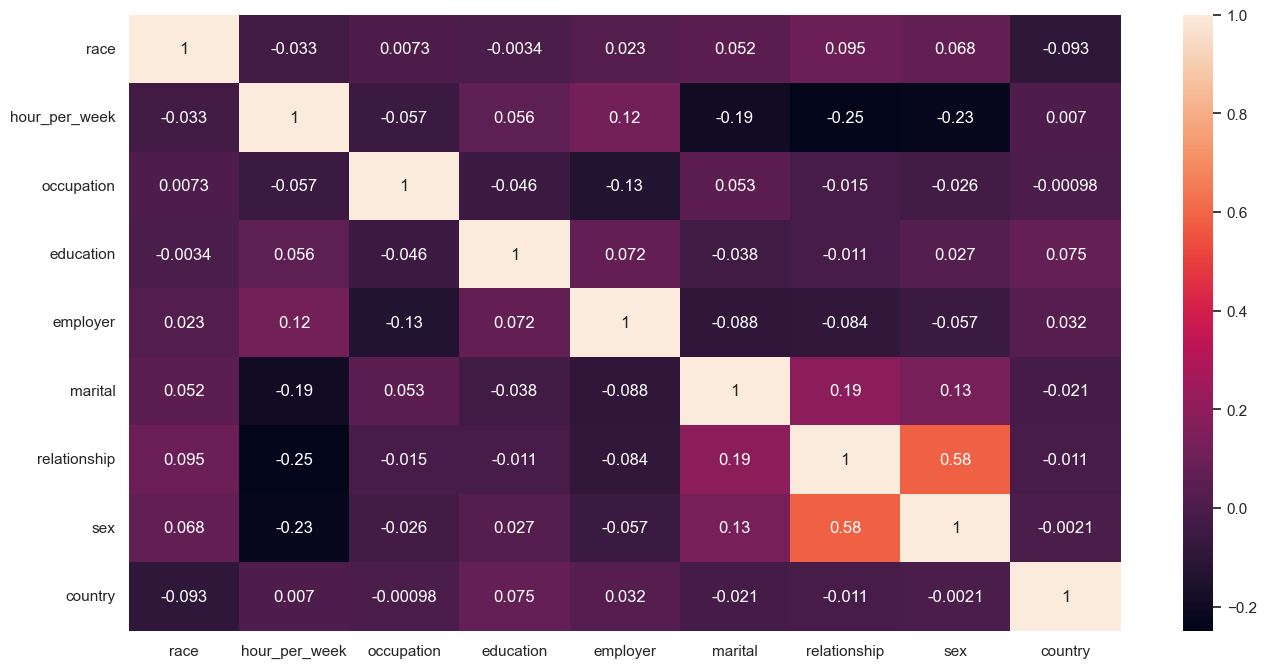

In [303]:
# Heatmap com das correlações
plt.figure(figsize=(16, 8))
sns.heatmap(data=correlation, annot=True)

> O heatmap nos mostra que há maior correlação entre **sex x relationship**

### 2.4 Variáveis de treino e de teste (30%)

In [304]:
X_test, X_train, y_test, y_train = train_test_split(X, Y, test_size = 0.3)

## 03 Máquinas Preditivas

In [305]:
dados['credit_approval'].value_counts()

1    24698
0     7839
Name: credit_approval, dtype: int64

In [306]:
# Contagem da classe alvo (credit_approval)
count = dados['credit_approval'].value_counts()
print(f'Crédito aprovado: {count[1]}')
print(f'Crédito não-aprovado: {count[0]}')

Crédito aprovado: 24698
Crédito não-aprovado: 7839


In [307]:
count_df = pd.DataFrame(count)

In [308]:
display(count)

1    24698
0     7839
Name: credit_approval, dtype: int64

c:\Users\jonat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, '1 - Crédito Aprovado | 0 - Não Aprovado')

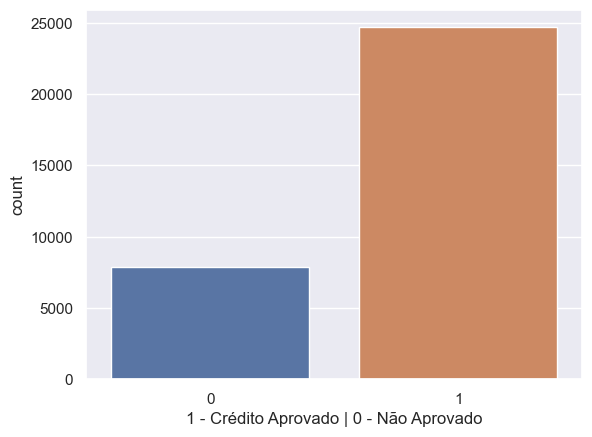

In [309]:
# Plot para melhor visualizar
sns.countplot(dados['credit_approval'])
plt.xlabel('1 - Crédito Aprovado | 0 - Não Aprovado')

In [310]:
# Porcentagem dos valores
perc_aprov = count[0]/len(dados) * 100
perc_n_aprov = count[1]/len(dados) * 100

In [311]:
print('% de créditos aprovados', round(perc_aprov, 2),'%')
print('% de créditos não-aprovados', round(perc_n_aprov, 2),'%')

% de créditos aprovados 24.09 %
% de créditos não-aprovados 75.91 %


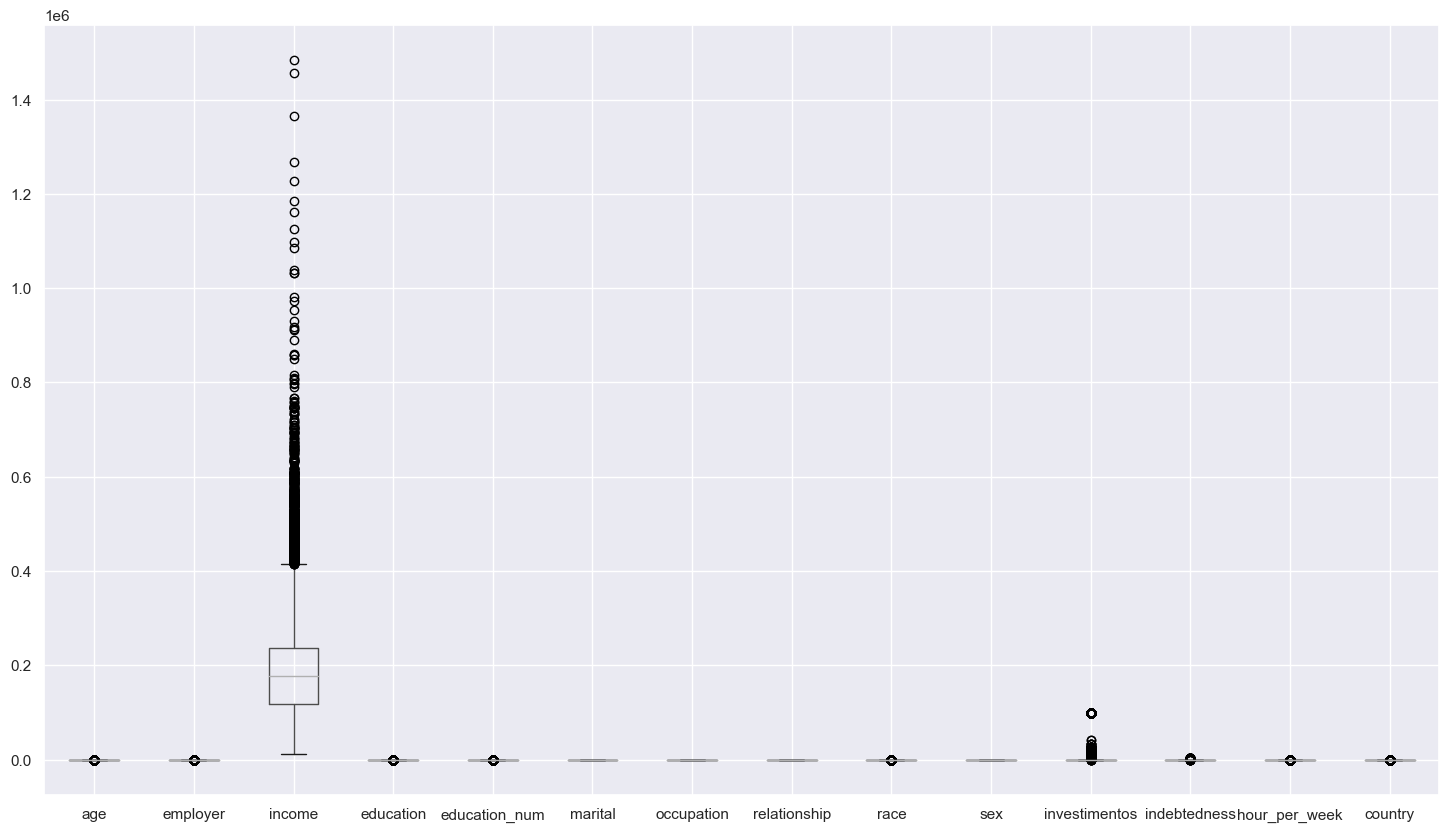

In [312]:
# Boxplot para analisar a quantidade de outliers
colunas = dados.columns.to_list()
plt.figure(figsize = (18, 10))
dados.boxplot(column = colunas[:-1])
plt.show()

> Separando os dados de Testes e Treino

In [313]:
# Bibliotecas
from imblearn.over_sampling import SMOTE
from collections import Counter

In [314]:
X = dados.iloc[:, :-1].values  # todas as colunas exceto a última
Y = dados.iloc[ : , -1].values # todas as linhas exceto a útima

#### XGBoost

In [316]:
# Biblioteca de balanceamento
#!pip install imbalanced-learn

In [317]:
# Bibliotecas
from imblearn.over_sampling import SMOTE
from collections import Counter

In [320]:
# Criando dados de treino e de teste
from sklearn.model_selection import train_test_split 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, shuffle = True, random_state = 0)

In [322]:
print(f'Dados paraa Treino: {X_train.shape[0]} amostras')
print(f'Dados para Teste: {X_test.shape[0]} amostras')

Dados paraa Treino: 34577 amostras
Dados para Teste: 14819 amostras


In [326]:
# Criando instância
clf = XGBClassifier(
    n_estimators = 650,
    max_depth = 10,
    learning_rate = 1,
    random_state = 0
)

# Treinando
clf.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=650, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=0, ...)

In [327]:
# Predição
Y_pred = clf.predict(X_test)

In [329]:
# Valores encontrados x valores atuais
pd.DataFrame(data={'Valores Atuais': Y_test, 'Valores Previstos': Y_pred}).head()

,Valores Atuais,Valores Previstos
0,1,1
1,0,1
2,1,1
3,0,0
4,0,0


> Aqui fica um pouco confuso quanto a validade das previsões, por isso construiremos uma matrix de confusão

In [336]:
# Biblioteca
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics

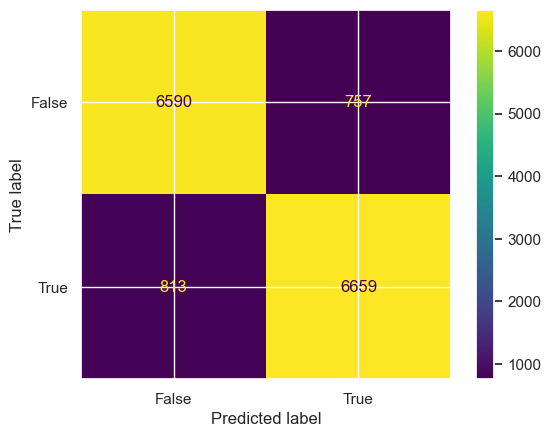

In [335]:
# Calcula a matriz de confusão
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)

# Cria o objeto para construir a matriz
cm_display = metrics.ConfusionMatrixDisplay(
    confusion_matrix = confusion_matrix,
    display_labels = [False, True],
    )

# Plot
cm_display.plot()

In [338]:
# Obtendo a acurácia
from sklearn.metrics import accuracy_score
print(f'Precisão do modelo: {round(accuracy_score(Y_test, Y_pred) * 100, 3)}%')

Precisão do modelo: 89.405%


#### Random Forest

In [345]:
# Instância do classificador RandomForest
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [346]:
# Treinamento do modelo
rf.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [348]:
y_pred_rf = rf.predict(X_test)

In [349]:
print(f'Precisão do modelo: {round(accuracy_score(Y_test, y_pred_rf) * 100, 3)}%')

Precisão do modelo: 89.014%


## 04 Avaliação da Máquina Preditiva

##### Relatório de Classificação XGBoost - 89.405%

In [351]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89      7347
           1       0.90      0.89      0.89      7472

    accuracy                           0.89     14819
   macro avg       0.89      0.89      0.89     14819
weighted avg       0.89      0.89      0.89     14819



##### Relatório de Classificação Random Forest - 89.014%

In [350]:
print(classification_report(Y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89      7347
           1       0.90      0.89      0.89      7472

    accuracy                           0.89     14819
   macro avg       0.89      0.89      0.89     14819
weighted avg       0.89      0.89      0.89     14819



## 05 Conclusões

O conjunto de dados é pequeno, com poucas variáveis mas já serviu para treinarmos análise e preparação dos dados, gerar insights e testar predições em Machine Learning, o que nos levou a ter ~90% de acurácia em ambas máquinas.